# Shaping the effect of different features on the prosper score  
## by: Amr Saber Awad Salem

## Investigation Overview

> In this presentation we're going to see how the prosper score has progressed through the years, and how it is affected by the Income range , Occupation, Loan original amount, and borrowers rate.

## Dataset Overview

> This dataset includes 113066 loan records, where the data types have been verified and duplicated inputs were removed. Moreover, each loan record is defined by some information that includes: Creation date, Borrower rate, term, income range, etc...

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
from traitlets.config import Config
import nbformat as nbf
from nbconvert.exporters import HTMLExporter
c = Config()
c.TagRemovePreprocessor.remove_input_tags = ('remove_input',)

In [3]:
df= pd.read_csv('prosperLoanData.csv')
df= df.drop_duplicates(subset=['ListingKey'])
df.reset_index(inplace=True)
df.fillna(0,inplace=True)

In [4]:
df['year']=df['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)

In [5]:
clean_df= df.copy()
cols= ['ListingCreationDate','Term','LoanStatus','BorrowerRate','ProsperScore','ListingCategory (numeric)',
       'Occupation','EmploymentStatus','EmploymentStatusDuration','OpenCreditLines','IncomeRange',
       'LoanOriginalAmount','MonthlyLoanPayment', 'year']
clean_df= clean_df[cols]

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Prosper Score time lapse

> The next figure shows the progress of the prosper score from 2005 to 2014. However, we can see there's an overall decline from 7.69 in 2009 to 5.99 in 2014, with exception in 2012 and 2014 where there was a slight rise in the prosper score from the previous year. 

Average prosper score in 2009:  7.689029918404351
Average prosper score in 2014:  5.999713876967096


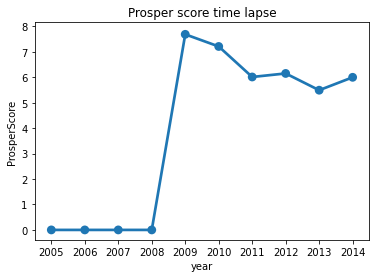

In [7]:
X= clean_df.sort_values('year')
sns.pointplot(data= clean_df, x=X['year'], y='ProsperScore');
plt.title('Prosper score time lapse');
print('Average prosper score in 2009: ',clean_df[clean_df['year']=='2009']['ProsperScore'].mean());
print('Average prosper score in 2014: ',clean_df[clean_df['year']=='2014']['ProsperScore'].mean());

## Prosper Score vs Occupation

> We might link a high paying job to a more secure financial status and hence, a higher average prosper score.
nd indeed, we can see that the most common high paying jobs have a prosper score more than 5. However, surprisingly we find that judges are the only ones whose average prosper score is 7.5, while the nearest one are the pharmacists and they are falling behind at 5.9.

Judges average prosper score:  7.5
Pharmacists average prosper score:  5.901960784313726


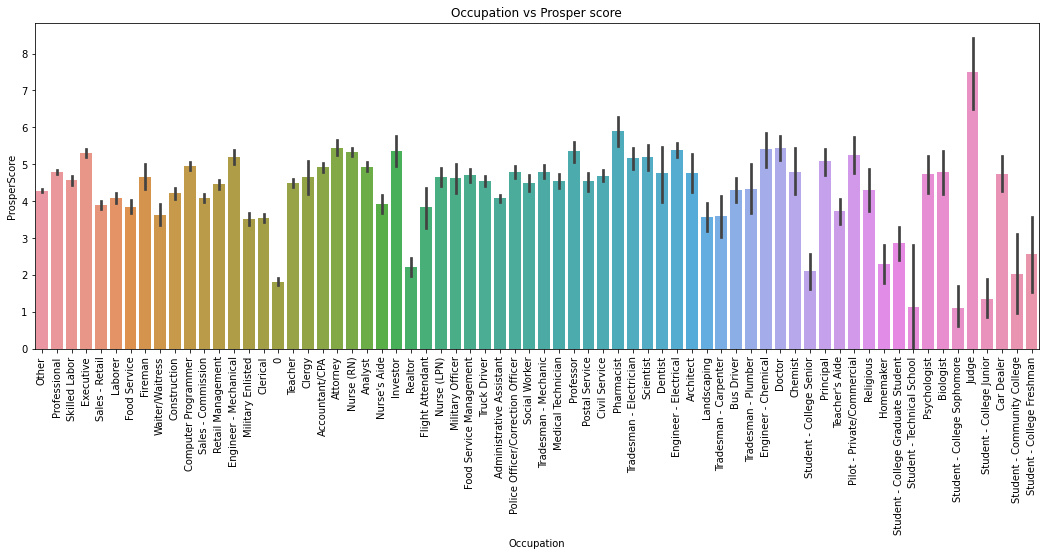

In [8]:
plt.figure(figsize = [18, 6]);
sns.barplot(data=clean_df,x='Occupation',y='ProsperScore');
plt.xlabel('Occupation');
plt.ylabel('ProsperScore');
plt.xticks(rotation=90);
plt.title('Occupation vs Prosper score');
print('Judges average prosper score: ',clean_df[clean_df['Occupation']=='Judge']['ProsperScore'].mean());
print('Pharmacists average prosper score: ',clean_df[clean_df['Occupation']=='Pharmacist']['ProsperScore'].mean());

## Prosper score vs. Loan original amount & Borrower rate
> In this figure we can see two distinct correlations:

1- Positive correlation between the prosper score and the loan original amount, as it expressed by the density of the points.

2- Negative correlation between the prosper score and the borrower rate, where it's evident from color gradient; which being the lightest at the lower prosper score "prosper score= 1" and darkest at "prosper score= 10,11". 


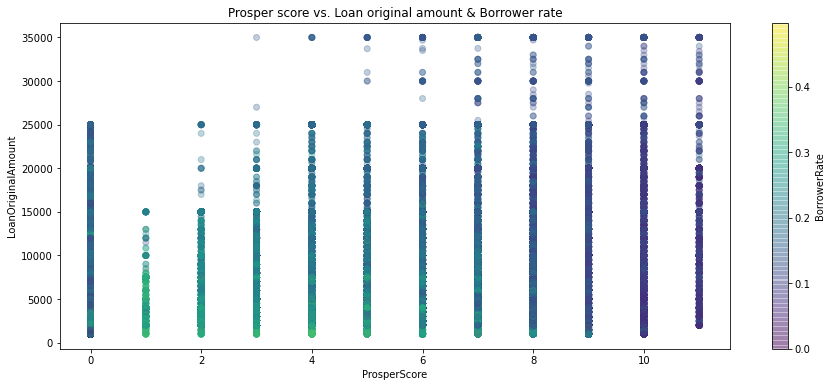

In [9]:
plt.figure(figsize = [15, 6]);
plt.scatter(data = clean_df, x = 'ProsperScore', y = 'LoanOriginalAmount', c ='BorrowerRate', alpha = 0.3);
plt.colorbar(label = 'BorrowerRate');
plt.title('Prosper score vs. Loan original amount & Borrower rate');
plt.xlabel('ProsperScore');
plt.ylabel('LoanOriginalAmount');